

# 项目：调查TMBd电影数据集

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据预处理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

本次数据分析选择数据集是tmdb-movies.csv文件，数据集包含了截止到2015年的TMBb电影统计数据，应用python数理统计和绘制可视化图表的方法进行数据分析，来回答：
- 1)每年最受欢迎的电影类别是哪些？ 
- 2)票房高的电影有哪些特点？ 
- 3)平均投票数分布情况 ，各阶段评分占比多少？ 
- 4)投票次数排名前四的电影风格与评分的关系 
- (数据集包含如下21个字段，是2015年上映电影流行度、票房、放映时长、平均评分等数据。) 

In [1]:
# 导入常用库。
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## 数据预处理
- 数据集中的样本数
- 数据集中的列数
- 数据集中每列的数据类型
- 数据集中每列有无缺失值的数据
- 数据集有无重复行

### 1.常规属性

In [2]:
# 加载数据并打印几行。进行这几项操作，来检查数据
#   类型，以及是否有缺失数据或错误数据的情况。
df1 = pd.read_csv('/Users/linkuaile/Desktop/tmdb_movies.csv')
df1.head(2)

,电影_id,IMDB_id,流行程度,预算,收益,电影名称,演员,主页,导演,标语,...,简介,播放时间,电影风格,出品公司,发行日,投票数,平均投票数,发行年份,调整后预算,调整后收益
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2006/9/15,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08


In [343]:
#返回数据框维度的元组（10866笔数据和21个索引）
df1.shape

(10866, 21)

In [344]:
#返回列的数据类型
#object类：所有Python类的基类
df1.dtypes

电影_id        int64
IMDB_id     object
流行程度       float64
预算           int64
收益           int64
电影名称        object
演员          object
主页          object
导演          object
标语          object
关键词         object
简介          object
播放时间         int64
电影风格        object
出品公司        object
发行日         object
投票数          int64
平均投票数      float64
发行年份         int64
调整后预算      float64
调整后收益      float64
dtype: object

In [345]:
#显示数据框的简明摘要
#info():给出样本数据的相关信息概览 ：行数，列数，列索引，列非空值个数，列类型，内存占用
#了解变量所存在的空值，方便进行整理
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   电影_id    10866 non-null  int64  
 1   IMDB_id  10856 non-null  object 
 2   流行程度     10866 non-null  float64
 3   预算       10866 non-null  int64  
 4   收益       10866 non-null  int64  
 5   电影名称     10866 non-null  object 
 6   演员       10790 non-null  object 
 7   主页       2936 non-null   object 
 8   导演       10822 non-null  object 
 9   标语       8042 non-null   object 
 10  关键词      9373 non-null   object 
 11  简介       10862 non-null  object 
 12  播放时间     10866 non-null  int64  
 13  电影风格     10843 non-null  object 
 14  出品公司     9836 non-null   object 
 15  发行日      10866 non-null  object 
 16  投票数      10866 non-null  int64  
 17  平均投票数    10866 non-null  float64
 18  发行年份     10866 non-null  int64  
 19  调整后预算    10866 non-null  float64
 20  调整后收益    10866 non-null  float64
dtypes: float64(4

In [346]:
#返回每列数据的有效描述性统计（describe:生成描述性统计，总结数据集分布的中心趋势，分散和形状，不包括NaN）
#对计数，平均值，标准差，最小值，最大值以及较低的百分位数查看
df1.describe()

,电影_id,流行程度,预算,收益,播放时间,投票数,平均投票数,发行年份,调整后预算,调整后收益
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [347]:
# 查看每列的索引号和标签
for index, lable in enumerate(df.columns):
    print(index, lable)

0 电影_id
1 IMDB_id
2 流行程度
3 预算
4 收益
5 电影名称
6 演员
7 主页
8 导演
9 标语
10 关键词
11 简介
12 播放时间
13 出品公司
14 发行日
15 投票数
16 平均投票数
17 发行年份
18 调整后预算
19 调整后收益
20 genres5
21 电影风格
22 vote_cut


### 2.数据处理
#### (1)去除不在本次分析的数据列

In [4]:
df=df1.drop(["主页","标语","关键词","简介","出品公司"],axis=1)

In [7]:
#vote用cut分段
vote_labels = ['VOTE:0~2','VOTE:2~4','VOTE:4~6','VOTE:6~8','VOTE:8~10']
df['vote_cut'] = pd.cut(df['平均投票数'],bins=[0,2,4,6,8,10],labels=vote_labels)

In [350]:
df.head(2)

,电影_id,IMDB_id,流行程度,预算,收益,电影名称,演员,导演,播放时间,电影风格,发行日,投票数,平均投票数,发行年份,调整后预算,调整后收益,vote_cut
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2006/9/15,5562,6.5,2015,137999939.3,1.392446e+09,VOTE:6~8
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08,VOTE:6~8



#### (2)数据去重

In [284]:
# 检查数据中的重复
sum(df.duplicated())

1

In [285]:
# 丢弃重复
df.drop_duplicates(inplace=True)
# 再次检查数据中的重复，确认修改
sum(df.duplicated())

0

#### (3)数据清理

In [286]:
#检查缺失值
df.isnull().sum()

电影_id        0
IMDB_id     10
流行程度         0
预算           0
收益           0
电影名称         0
演员          76
导演          44
播放时间         0
电影风格        23
发行日          0
投票数          0
平均投票数        0
发行年份         0
调整后预算        0
调整后收益        0
vote_cut     0
dtype: int64

In [287]:
#将IMDB_id为空的数据去除
df.dropna(subset=['IMDB_id'], inplace=True)
df['IMDB_id'].isnull().sum()

0

In [288]:
#将电影风格为空的数据去除
df.dropna(subset=['电影风格'], inplace=True)
df['电影风格'].isnull().sum()

0

<a id='eda'></a>
## 探索性数据分析



### 1.每年最受欢迎的电影类别是哪些？ 

想了解最受欢迎的电影类别，我们可以通过统计各电影类别的数量，从各类型影片的数量多少的角度，来了解哪些类型的电影较受欢迎。

In [289]:
#查看本次数据集电影年份的跨度
df['发行年份'].min(),  df['发行年份'].max()

(1960, 2015)

In [290]:
#共有多少种独特的电影类别
df['电影风格'].unique().size

2037

In [291]:
#因为每个电影有众多类型，我们将类型分离
df_clean=df['电影风格'].str.split('|',expand=True) 
df_clean.head()

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


- 我们可以看到一个电影可以包含多种电影风格类型。
- 上图数据表中出现重复现象

In [292]:
#因为每个电影有众多类型，我们将类型分离
#对表格进行扩列
df[['g1','g2','g3','g4','g5']]=df['电影风格'].str.split('|',expand=True)
df

,电影_id,IMDB_id,流行程度,预算,收益,电影名称,演员,导演,播放时间,电影风格,...,平均投票数,发行年份,调整后预算,调整后收益,vote_cut,g1,g2,g3,g4,g5
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,...,6.5,2015,1.379999e+08,1.392446e+09,VOTE:6~8,Action,Adventure,Science Fiction,Thriller,None
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,...,7.1,2015,1.379999e+08,3.481613e+08,VOTE:6~8,Action,Adventure,Science Fiction,Thriller,None
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,...,6.3,2015,1.012000e+08,2.716190e+08,VOTE:6~8,Adventure,Science Fiction,Thriller,None,None
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,...,7.5,2015,1.839999e+08,1.902723e+09,VOTE:6~8,Action,Adventure,Science Fiction,Fantasy,None
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,...,7.3,2015,1.747999e+08,1.385749e+09,VOTE:6~8,Action,Crime,Thriller,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,...,7.4,1966,0.000000e+00,0.000000e+00,VOTE:6~8,Documentary,None,None,None,None
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,...,5.7,1966,0.000000e+00,0.000000e+00,VOTE:4~6,Action,Adventure,Drama,None,None
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,...,6.5,1966,0.000000e+00,0.000000e+00,VOTE:6~8,Mystery,Comedy,None,None,None
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,...,5.4,1966,0.000000e+00,0.000000e+00,VOTE:4~6,Action,Comedy,None,None,None


In [293]:
#先按照流行程度排好序，然后按照发行年份分组，最后每组取第一个
df_1=df.sort_values('流行程度', ascending=False).groupby('发行年份', as_index=False).first()
df_1

,发行年份,电影_id,IMDB_id,流行程度,预算,收益,电影名称,演员,导演,播放时间,...,投票数,平均投票数,调整后预算,调整后收益,vote_cut,g1,g2,g3,g4,g5
0,1960,539,tt0054215,2.610362,806948,32000000,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,109,...,1180,8.0,5.949601e+06,2.359350e+08,VOTE:6~8,Drama,Horror,Thriller,Science Fiction,Romance
1,1961,12230,tt0055254,2.631987,4000000,215880014,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,79,...,913,6.6,2.917944e+07,1.574815e+09,VOTE:6~8,Adventure,Animation,Comedy,Family,War
2,1962,646,tt0055928,3.170651,1100000,59600000,Dr. No,Sean Connery|Ursula Andress|Joseph Wiseman|Jac...,Terence Young,110,...,560,6.7,7.929294e+06,4.296236e+08,VOTE:6~8,Adventure,Action,Thriller,War,Foreign
3,1963,657,tt0057076,2.508235,2500000,78898765,From Russia With Love,Sean Connery|Daniela Bianchi|Lotte Lenya|Rober...,Terence Young,115,...,458,6.7,1.780045e+07,5.617734e+08,VOTE:6~8,Action,Thriller,Adventure,Thriller,War
4,1964,658,tt0058150,3.153791,3500000,124900000,Goldfinger,Sean Connery|Honor Blackman|Gert FrÃ¶be|Shirle...,Guy Hamilton,110,...,602,7.0,2.460594e+07,8.780804e+08,VOTE:6~8,Adventure,Action,Thriller,Fantasy,Comedy
5,1965,660,tt0059800,1.910465,11000000,141195658,Thunderball,Sean Connery|Claudine Auger|Adolfo Celi|Lucian...,Terence Young,130,...,331,6.3,7.612620e+07,9.771535e+08,VOTE:6~8,Adventure,Action,Thriller,Romance,War
6,1966,13377,tt0060345,1.227582,315000,0,How the Grinch Stole Christmas!,Boris Karloff|June Foray|Thurl Ravenscroft|Dal...,Chuck Jones|Ben Washam,26,...,286,7.1,2.116175e+06,0.000000e+00,VOTE:6~8,Animation,Family,Comedy,Science Fiction,Crime
7,1967,9325,tt0061852,2.550704,4000000,205843612,The Jungle Book,Phil Harris|Sebastian Cabot|Louis Prima|George...,Wolfgang Reitherman,78,...,928,7.0,2.614705e+07,1.345551e+09,VOTE:6~8,Family,Animation,Adventure,Crime,Mystery
8,1968,62,tt0062622,3.309196,12000000,56715371,2001: A Space Odyssey,Keir Dullea|Douglas Rain|Gary Lockwood|William...,Stanley Kubrick,149,...,1708,7.7,7.522756e+07,3.555466e+08,VOTE:6~8,Science Fiction,Mystery,Adventure,Thriller,War
9,1969,668,tt0064757,1.778746,7000000,81974493,On Her Majesty's Secret Service,George Lazenby|Diana Rigg|Telly Savalas|Gabrie...,Peter R. Hunt,142,...,258,6.4,4.160985e+07,4.872780e+08,VOTE:6~8,Adventure,Action,Thriller,Crime,Music


In [294]:
#将每一年最流行的电影中的电影风格进行统计
#g1代表该电影主要风格
df_g=(df_1[['g1','g2','g3','g4','g5']] ).apply(pd.value_counts)   
df_g

,g1,g2,g3,g4,g5
Action,10.0,14.0,5.0,2.0,2.0
Adventure,17.0,5.0,7.0,7.0,2.0
Animation,5.0,3.0,1.0,NaN,NaN
Comedy,2.0,2.0,4.0,2.0,4.0
Crime,3.0,3.0,1.0,4.0,2.0
Drama,6.0,6.0,2.0,NaN,1.0
Family,1.0,4.0,4.0,6.0,6.0
Fantasy,1.0,7.0,1.0,4.0,5.0
Foreign,NaN,NaN,NaN,NaN,1.0
Horror,2.0,1.0,1.0,1.0,NaN


In [295]:
#填充NaN，方便计算
df_g.fillna(0, inplace=True)
#累加计算
df_g['Col_sum'] = df_g.apply(lambda x: x.sum(), axis=1)
df_g

,g1,g2,g3,g4,g5,Col_sum
Action,10.0,14.0,5.0,2.0,2.0,33.0
Adventure,17.0,5.0,7.0,7.0,2.0,38.0
Animation,5.0,3.0,1.0,0.0,0.0,9.0
Comedy,2.0,2.0,4.0,2.0,4.0,14.0
Crime,3.0,3.0,1.0,4.0,2.0,13.0
Drama,6.0,6.0,2.0,0.0,1.0,15.0
Family,1.0,4.0,4.0,6.0,6.0,21.0
Fantasy,1.0,7.0,1.0,4.0,5.0,18.0
Foreign,0.0,0.0,0.0,0.0,1.0,1.0
Horror,2.0,1.0,1.0,1.0,0.0,5.0


Text(0, 0.5, 'Popularity')

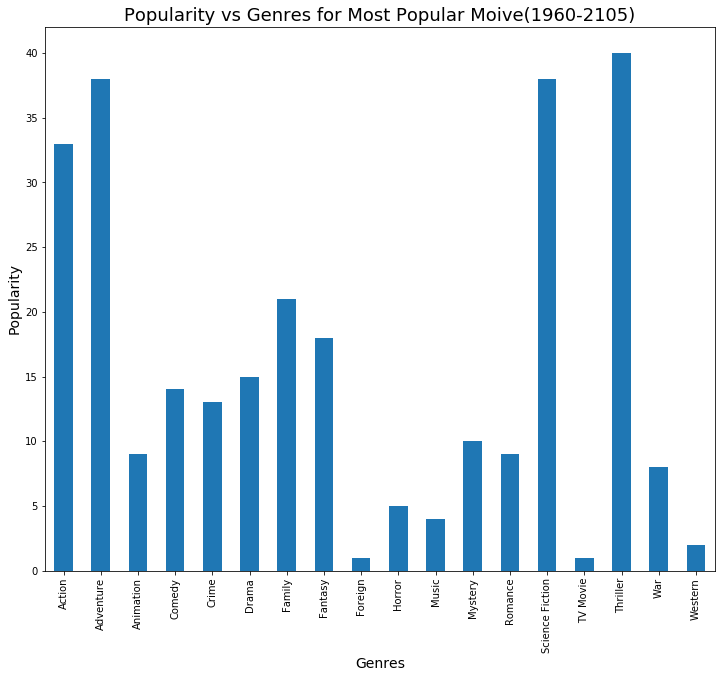

In [296]:
df_g['Col_sum'].plot(kind='bar',figsize=(12,10))
plt.title('Popularity vs Genres for Most Popular Moive(1960-2105)',fontsize=18)
plt.xlabel('Genres',fontsize=14)
plt.ylabel('Popularity',fontsize=14)

先对1960-2015年，每年最流行的电影进行筛选，再从这56部电影中统计电影风格，Thriller(惊悚片)、Adventure(冒险)、Science Fiction(科幻)类型影片数量排名前三

### 2.票房高的电影有哪些特点？

想了解票房高的电影具有的特点，我们可以根据现有数据中票房参数和其他参数间的相关性，来了解票房高的电影的特点。下方是研究票房与预算投入相关性，以及票房与平均评分相关性的流程。

In [297]:
# 所有统计电影的平均票房
format(df['收益'].mean(), '.2f')

'39940855.26'

In [298]:
#计算电影成本，并取出盈利最高的前10部电影
df['盈利']=df['收益']-df['预算']
df2=df.sort_values('盈利',ascending=False).head(10)
df2[['电影名称','流行程度','盈利']]

,电影名称,流行程度,盈利
1386,Avatar,9.432768,2544505847
3,Star Wars: The Force Awakens,11.173104,1868178225
5231,Titanic,4.355219,1645034188
0,Jurassic World,32.985763,1363528810
4,Furious 7,9.335014,1316249360
4361,The Avengers,7.637767,1299557910
3374,Harry Potter and the Deathly Hallows: Part 2,5.711315,1202817822
14,Avengers: Age of Ultron,5.944927,1125035767
5422,Frozen,6.112766,1124219009
8094,The Net,1.136610,1084279658


Text(0.5, 1.0, 'Profit vs Genres (Top 10 Best profit Movie)')

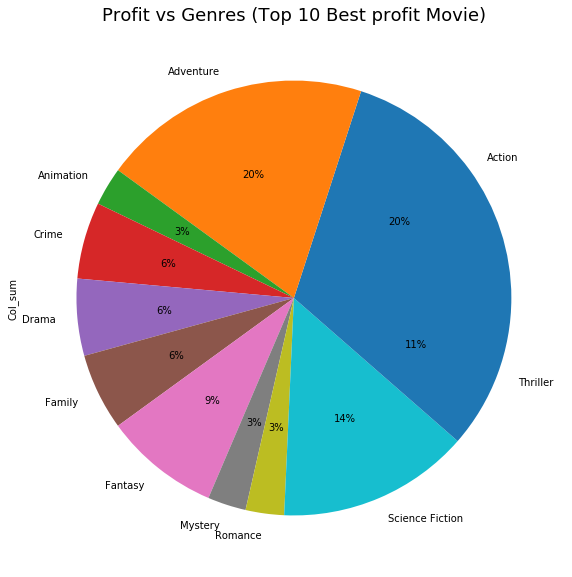

In [299]:
#查看这10部电影与genres有哪些关系：
df2_g=(df2[['g1','g2','g3','g4','g5']] ).apply(pd.value_counts)   
#填充nan值，方便计算
df2_g.fillna(0, inplace=True)
#根据盈利和电影风格的关系作出扇状图
df2_g['Col_sum'] = df2_g.apply(lambda x: x.sum(), axis=1)
df2_g['Col_sum'].plot(kind='pie',figsize=(10,10),autopct='%.0f%%')
plt.title('Profit vs Genres (Top 10 Best profit Movie)',fontsize=18)

通过上面的数据处理，我们知道：盈利最多的10部电影中，以下类型是数量最多的：Action，Adventure，Science Fiction，Thriller

Text(0.5, 0, 'Profit')

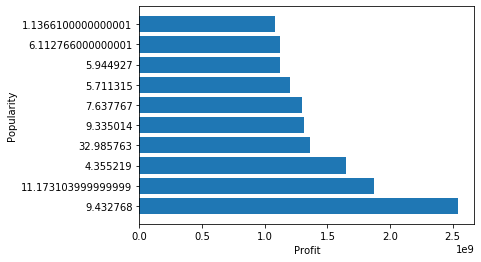

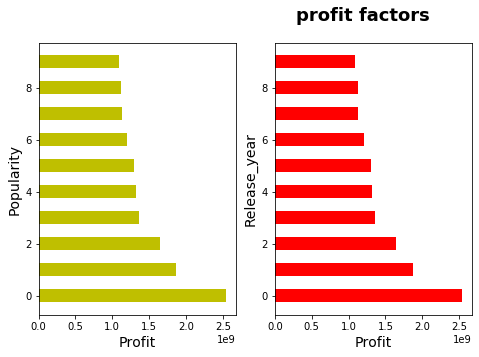

In [301]:
#查看这10部电影与流行程度，发行年份有哪些关系

plt.barh(np.arange(10),df2['盈利'],tick_label=df2['流行程度'])
plt.xlabel('Profit')
plt.ylabel('Popularity')
#设置画布大小
fig = plt.figure(figsize=(12,5)) 
#加上图像标题, fontsize=14 字体大小, fontweight='bold' 加粗
fig.suptitle('profit factors', fontsize=18, fontweight='bold') 

#添加第一个子图
ax1 = fig.add_subplot(131)
plt.barh(np.arange(10), df2['盈利'], height=0.5, color='y')
plt.ylabel('Popularity',fontsize=14) 
plt.xlabel('Profit',fontsize=14) 

#添加第二个子图
ax2 = fig.add_subplot(132)
plt.barh(np.arange(10),df2['盈利'], height=0.5,color='r')
plt.ylabel('Release_year',fontsize=14) 
plt.xlabel('Profit',fontsize=14)

In [302]:
df2['流行程度'].mean()

9.3825253

通过上面的数据处理，盈利最多的10部电影,受欢迎的平均程度为9.4分

In [303]:
df2['发行年份'].value_counts()

2015    4
1995    1
1997    1
2012    1
2011    1
2009    1
2013    1
Name: 发行年份, dtype: int64

通过上面的数据处理，盈利最多的10部电影,有4部电影出自2015年。

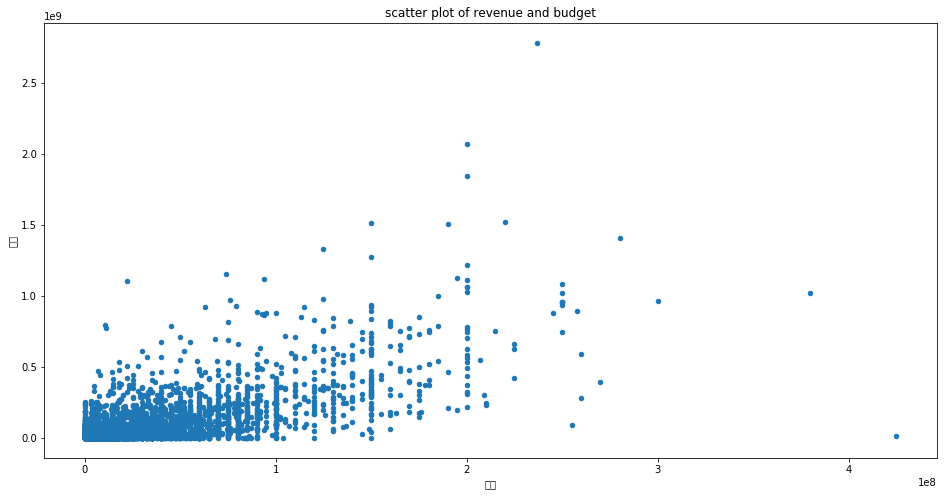

In [305]:
# 绘制票房与预算之间的关系图
df.plot(x='预算', y='收益', kind='scatter', figsize = (16, 8), title='scatter plot of revenue and budget')

根据影片的票房和预算数据，生成上方票房与预算之间的关系散点图，可以看出票房在10亿以上的高票房电影，预算绝大部分分布在1亿以上。

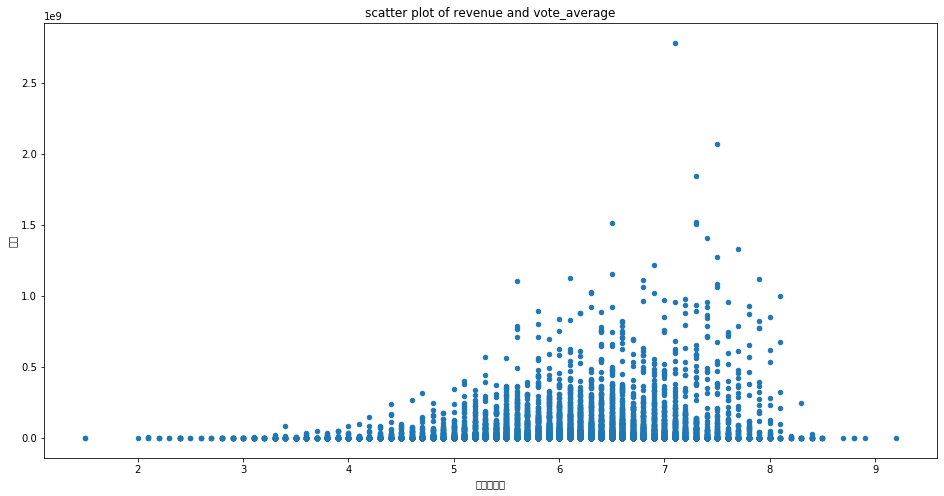

In [307]:
# 绘制票房与平均评分之间的关系图
df.plot(x='平均投票数', y='收益', kind='scatter', figsize = (16, 8), title='scatter plot of revenue and vote_average')

In [308]:
df['收益'].corr(df['预算'])

0.7348243132510561

- 根据影片的票房和平均评分数据，生成上方票房与平均评分之间的关系散点图，票房在10亿以上的高票房电影，平均评分绝大部分分布在6分以上，6到9分之间，5分以下未出现票房超过1亿的电影。
- 收益与预算相关性一般。

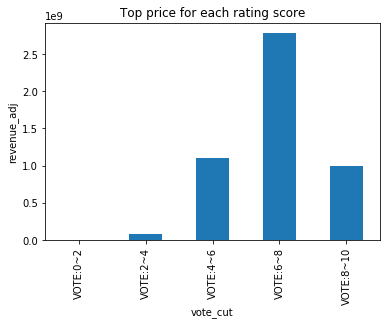

In [520]:
# 平均投票分数与收益的关系
df.groupby('vote_cut')['收益'].max().plot.bar()
plt.title('Top price for each rating score')
plt.ylabel('revenue_adj');

In [521]:
df['平均投票数'].corr(df['收益'])

0.17254138492900234

In [5]:
df['流行程度'].corr(df['收益'])

0.6633583664517383

In [9]:
df['投票数'].corr(df['收益'])

0.7911747896532916

平均投票与收益不具备相关性，较高的收益都集中在5到8分之间，评分高有可能有较高的收益。

### 3.平均投票数分布情况 ，各阶段评分占比多少？

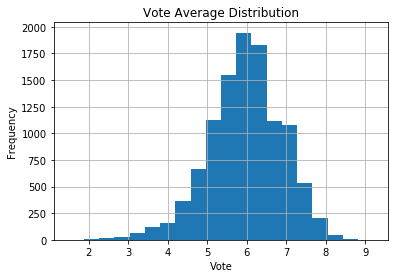

In [309]:
df['平均投票数'].hist(bins=20,figsize=(6,4))
plt.title('Vote Average Distribution')
plt.ylabel('Frequency')
plt.xlabel('Vote');

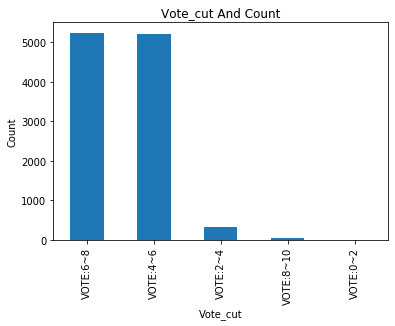

In [310]:
df['vote_cut'].value_counts().plot.bar(figsize=(6,4))
plt.title('Vote_cut And Count')
plt.ylabel('Count')
plt.xlabel('Vote_cut');

数据成正态分布，评分大多集中在4分到8分之间。

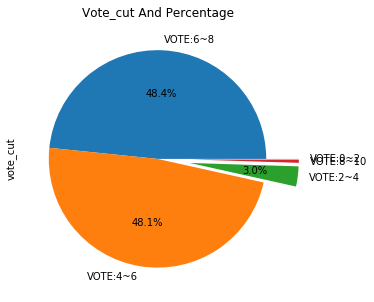

In [311]:
df.vote_cut.value_counts().plot.pie(explode = (0,0,0.3,0.3,0.3), autopct=lambda pct:'' if pct< 1 else "{:.1f}%".format(pct),figsize=(5,5))
plt.title('Vote_cut And Percentage');

根据平均投票数，电影评分在4～8中，呈正态分布

### 4.投票次数排名前四的电影风格与评分的关系

In [473]:
df1 = pd.read_csv('/Users/linkuaile/Desktop/tmdb_movies.csv')

In [502]:
#缺失值向下填充
a = df1.isnull().sum()
a = a[a > 0].index
def mf(name):
    df1[name] = df1[name].fillna(method='ffill')
    return df
for b in a:
    mf(b)

In [503]:
#vote用cut分段
vote_labels = ['VOTE:0~2','VOTE:2~4','VOTE:4~6','VOTE:6~8','VOTE:8~10']
df1['vote_cut'] = pd.cut(df['平均投票数'],bins=[0,2,4,6,8,10],labels=vote_labels)

In [504]:
#取数据中非nan值
df1 = df1[df1['电影风格'].notna()]
#一列中的文本拆分为多行
df1 =  df1.drop('电影风格', axis=1).join(df['电影风格'].str.split('|', expand=True).stack().reset_index(level=1, drop = True).rename('电影风格'))


In [505]:
df1['电影风格'].value_counts()

Drama              40056
Thriller           30603
Comedy             30102
Action             29600
Adventure          20720
Crime              16145
Romance            15603
Science Fiction    14792
Family             14384
Fantasy            12759
Horror             12609
Mystery            10094
Animation           7978
Music               3749
History             3520
War                 3063
Foreign             2165
TV Movie            2082
Western             1699
Documentary         1460
Name: 电影风格, dtype: int64

In [506]:
b = df1['电影风格'].value_counts().head(4).index

In [507]:
c = df1['电影风格'].value_counts().index

In [508]:
df1['genres5'] = df1['电影风格']

In [509]:
for a in c:
    if a not in b:
        df1['genres5'].replace(a,'other_genres',inplace=True)

In [510]:
df1['genres5'].value_counts()

other_genres    142822
Drama            40056
Thriller         30603
Comedy           30102
Action           29600
Name: genres5, dtype: int64

In [511]:
df_g = df1[df1['genres5']!= 'other_genres']

In [512]:
df_g.groupby(['vote_cut','genres5']).size().unstack()

genres5,Action,Comedy,Drama,Thriller
vote_cut,,,,
VOTE:0~2,18,0,0,0
VOTE:2~4,1346,659,508,1153
VOTE:4~6,15605,15859,17899,16565
VOTE:6~8,12611,13540,21526,12836
VOTE:8~10,20,44,123,49


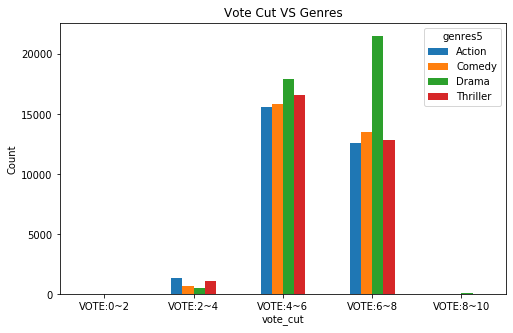

In [513]:
df_g.groupby(['vote_cut','genres5']).size().unstack().plot.bar(figsize=(8,5))
plt.title('Vote Cut VS Genres')
plt.xticks(rotation=0) # 控制 x 轴刻度文字的角度
plt.ylabel('Count');

在投票次数排名前四的电影类型中，大部分投票都集中在4至8分，在vote：4-6中喜剧和戏剧次数相当，在vote：6-8中戏剧次数最多。

<a id='conclusions'></a>
## 结论



1）在获得根据上面各类型电影的数量统计数据，先对1960-2015年，每年最流行的电影进行筛选，再从这56部电影中统计电影风格，Thriller(惊悚片)、Adventure(冒险)、Science Fiction(科幻)类型影片数量排名前三。因此从各类型电影数量角度来看，冒险类、科幻类、惊悚类影片较受青睐。除此之外，还可以从各类型影片的平均评分的角度来考虑各类型电影的受欢迎程度。本次分析主要根据类型电影流行程度分析。

2）
- 根据票房与预算之间和的散点关系图，可以看出：票房在10亿以上的高票房电影，预算绝大部分分布在1亿以上，且总体上呈正相关关系。由此可以票房高的电影绝大部分具备预算投入高的特点。
- 根据票房与平均评分之间和的散点关系图，可以看出：票房在10亿以上的高票房电影，平均评分绝大部分分布在6分以上，6到9分之间，5分以下未出现票房超过1亿的电影。由此可以票房高的电影绝大部分具备平均评分较高的特点。收益与预算相关性一般。
- 根据平均投票分数与收益的关系，平均投票与收益不具备相关性，较高的收益都集中在5到8分之间，评分高有可能有较高的收益。

3） 根据平均投票数的分数分布柱状图、扇状图以及评分分段图中，我们可以看出评分大多集中在4分到8分之间。

4） 在投票次数排名前四的电影类型中，大部分投票都集中在4至8分，在vote：4-6中Comedy和Drama次数相当，在vote：6-8中Drama次数最多